
#Assignment No 4d
######*Sibt ul Hussain*
----
##Goal

Your goal in this assigment is to implement and test different variants of Random Forests. For this part you will be implemented randomized version of Conic weak learner based Random Forest.

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

##Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

##Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 

In [3]:
# Create some dummy data for testing
np.random.seed(seed=99)

## Let's cook some data up for a multi-class classification problem...

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


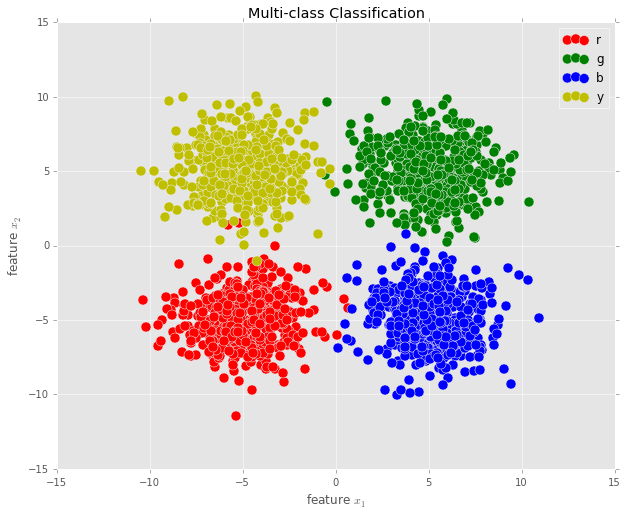

In [4]:
#generate training and testing set...by sampling from mutli-variate Gaussian
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points for the training set...
nexamples=2000
x1 = np.random.multivariate_normal(mean1,cov,nexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,nexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,nexamples/4)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((nexamples/4,1)),2*np.ones((nexamples/4,1)),3*np.ones((nexamples/4,1)),4*np.ones((nexamples/4,1))))


plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='g', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='y', s=100)            



plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r','g','b','y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg',format='svg')
#create some points for the training set..

ntexamples=1000
x1 = np.random.multivariate_normal(mean1,cov,ntexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,ntexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,ntexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,ntexamples/4)

Xt=np.vstack((x1,x2,x3,x4))
Yt=np.vstack((1*np.ones((ntexamples/4,1)),2*np.ones((ntexamples/4,1)),3*np.ones((ntexamples/4,1)),4*np.ones((ntexamples/4,1))))


In [5]:
import randomForest as rf

In [6]:
rfc=rf.RandomForest(weaklearner='Conic')

In [7]:
print X.shape, Y.shape

(2000, 2) (2000, 1)


In [8]:
%pdb
rfc.train(X,Y)

Automatic pdb calling has been turned ON
Creating Left Child Node With 1010 Examples, and Right Node with 990 Examples
Creating Left Child Node With 486 Examples, and Right Node with 524 Examples
Creating Left Child Node With 309 Examples, and Right Node with 177 Examples
Creating Left Child Node With 54 Examples, and Right Node with 255 Examples
Creating Child Node With ClassLabel=2.0, nexamples=54, classes=[(2.0, 54)]
Creating Child Node With ClassLabel=4.0, nexamples=255, classes=[(2.0, 3), (4.0, 252)]
Creating Left Child Node With 0 Examples, and Right Node with 177 Examples
Creating Child Node With ClassLabel=4.0, nexamples=177, classes=[(4.0, 177)]
Creating Left Child Node With 27 Examples, and Right Node with 497 Examples
Creating Left Child Node With 17 Examples, and Right Node with 10 Examples
Creating Child Node With ClassLabel=4.0, nexamples=17, classes=[(1.0, 3), (2.0, 2), (4.0, 12)]
Creating Child Node With ClassLabel=4.0, nexamples=10, classes=[(4.0, 10)]
Creating Left Ch

In [9]:
len(rfc.trees)

10

In [10]:
%pdb
# Training Confusion Matrix...
Yp=rfc.predict(X)
print Y.shape, len(Yp)
t.print_confusion_matrix(Yp,Y)

Automatic pdb calling has been turned OFF
(2000, 1) 2000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,494,0,2,4,500
2.0,0,499,0,1,500
3.0,3,2,495,0,500
4.0,1,0,0,499,500
All,498,501,497,504,2000


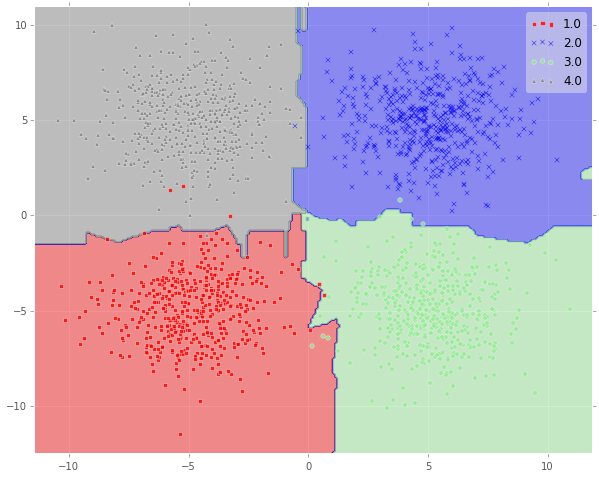

In [11]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-rlinear-10trees.svg',format='svg')

In [12]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print Y.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Yt)

(2000, 1) 1000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,247,0,0,3,250
2.0,0,249,0,1,250
3.0,1,1,248,0,250
4.0,0,1,0,249,250
All,248,251,248,253,1000


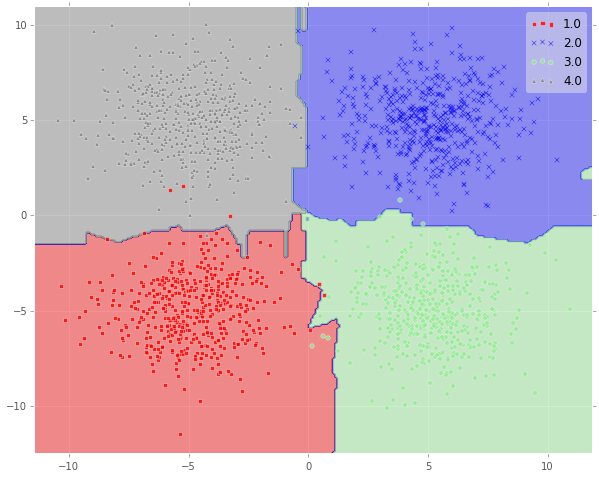

In [13]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

In [14]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
import tools as t

(10000, 2)
[1.0, 2.0, 3.0, 4.0]


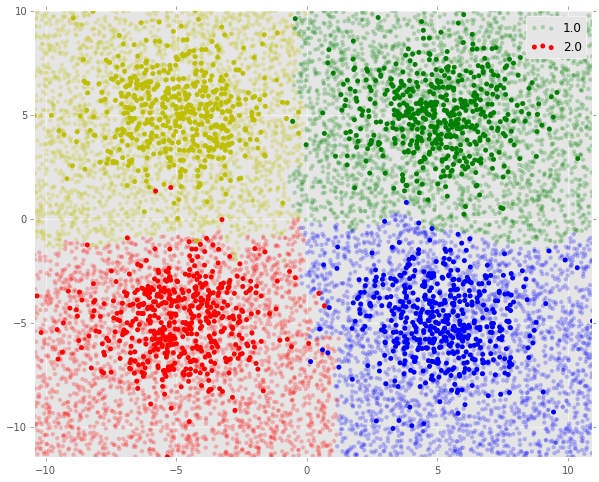

In [15]:
t.plot_points_range(rfc,X,Y,10000)

###Lets Plot Per-Tree Decision Boundary

Automatic pdb calling has been turned OFF


<function matplotlib.pyplot.tight_layout>

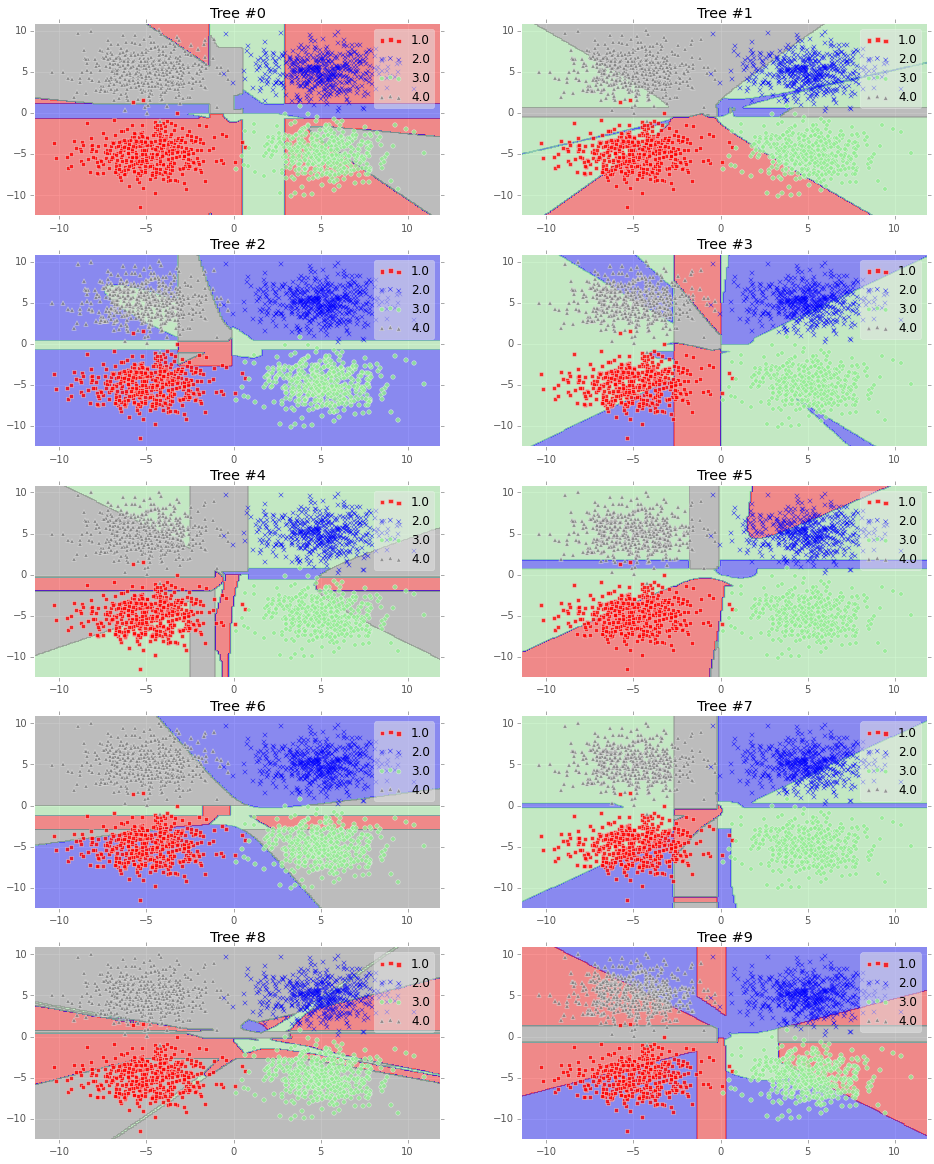

In [17]:
%pdb
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=0
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i+1);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

####What Can You conclude

##Lets Run on Nonlinear Data, The Spherical Examples...

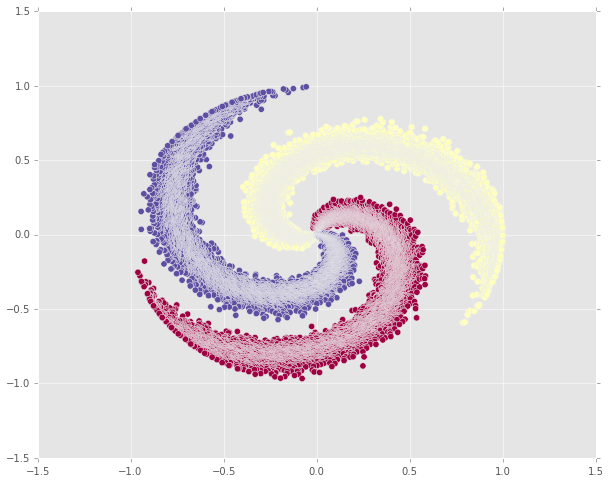

In [18]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)

In [19]:
print X.shape, Y.shape

(30000, 2) (30000,)


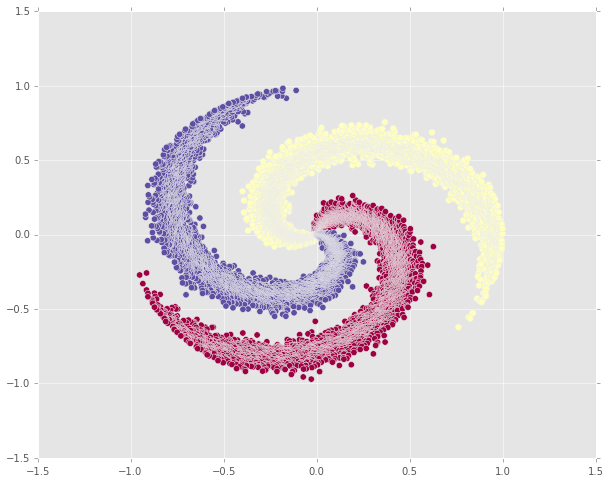

In [20]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [21]:
rfc=rf.RandomForest(weaklearner='Conic',usebagging=False,ntrees=20)
rfc.train(X,Y[:,np.newaxis])

Creating Left Child Node With 9509 Examples, and Right Node with 20491 Examples
Creating Left Child Node With 7068 Examples, and Right Node with 2441 Examples
Creating Left Child Node With 2004 Examples, and Right Node with 5064 Examples
Creating Left Child Node With 1039 Examples, and Right Node with 965 Examples
Creating Child Node With ClassLabel=1, nexamples=1039, classes=[(1, 1039)]
Creating Child Node With ClassLabel=1, nexamples=965, classes=[(1, 875), (2, 90)]
Creating Left Child Node With 4309 Examples, and Right Node with 755 Examples
Creating Child Node With ClassLabel=2, nexamples=4309, classes=[(0, 25), (2, 4284)]
Creating Child Node With ClassLabel=0, nexamples=755, classes=[(0, 552), (2, 203)]
Creating Left Child Node With 13 Examples, and Right Node with 2428 Examples
Creating Left Child Node With 0 Examples, and Right Node with 13 Examples
Creating Child Node With ClassLabel=2, nexamples=13, classes=[(2, 13)]
Creating Left Child Node With 1221 Examples, and Right Node 

In [22]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print Y.shape, len(Yp)
t.print_confusion_matrix(Yp,Y)

(30000,) 30000


Predicted,0.0,1.0,2.0,All
Actual,,,,
0,9702,228,70,10000
1,103,9897,0,10000
2,48,874,9078,10000
All,9853,10999,9148,30000


In [23]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)
print Y.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Ytest)

(30000,) 15000


Predicted,0.0,1.0,2.0,All
Actual,,,,
0,4852,117,31,5000
1,58,4942,0,5000
2,23,444,4533,5000
All,4933,5503,4564,15000


(10000, 2)
[0.0, 1.0, 2.0]


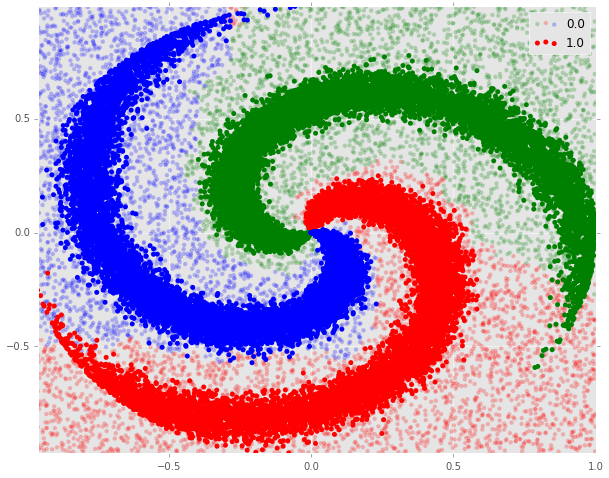

In [24]:
t.plot_points_range(rfc,X,Y)

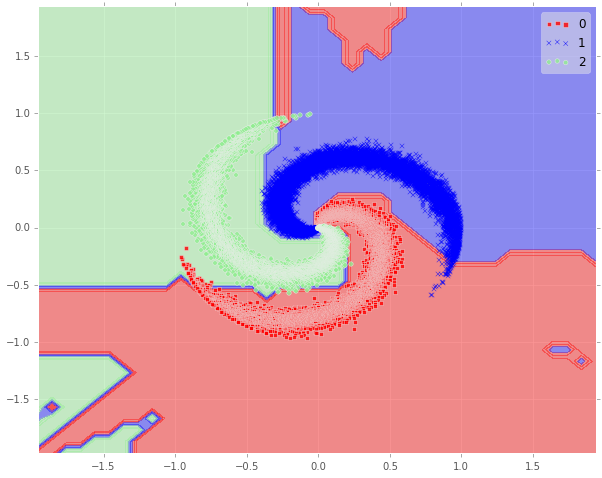

In [25]:
t.plot_decision_regions(X,Y,rfc,res=0.1)

###Lets Plot Per-Tree Decision Boundary

Automatic pdb calling has been turned ON


<function matplotlib.pyplot.tight_layout>

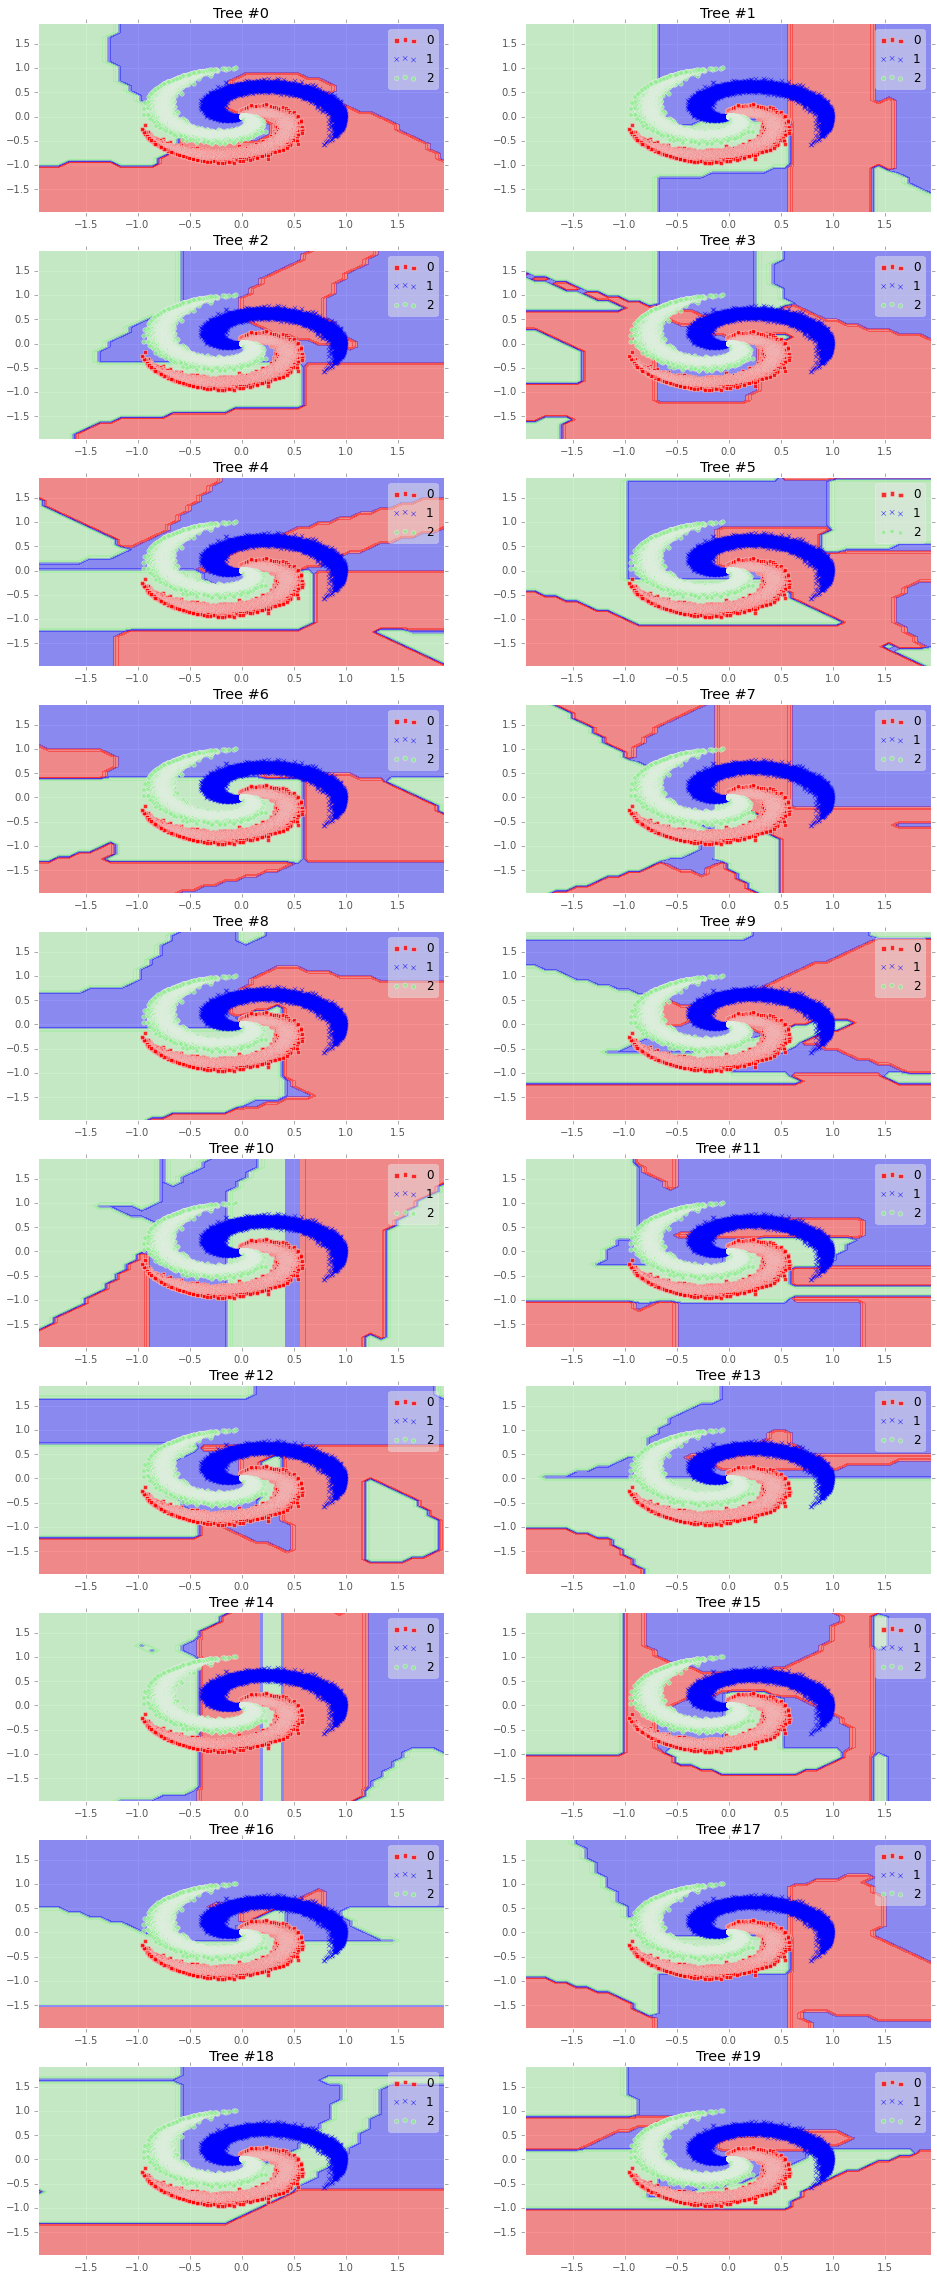

In [26]:
%pdb
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=0
plt.subplots(nrows,ncols,figsize=(16,40))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i+1);
    t.plot_decision_regions(X,Y,clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout
    

##TODO: Find Optimal Number of Trees for this data set, using cross validation...